In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
# Change this to the location of your data folder on Google Drive
data_folder_path = '/content/drive/My Drive/Data'


Mounted at /content/drive


Enter the quarter name/number: 3
Enter the month (e.g., Jan, Feb, etc.): Jan
Enter the year you want to predict for: 2025
Predicted total units consumed for quarter 3 in Jan 2025: 395.72727272727207


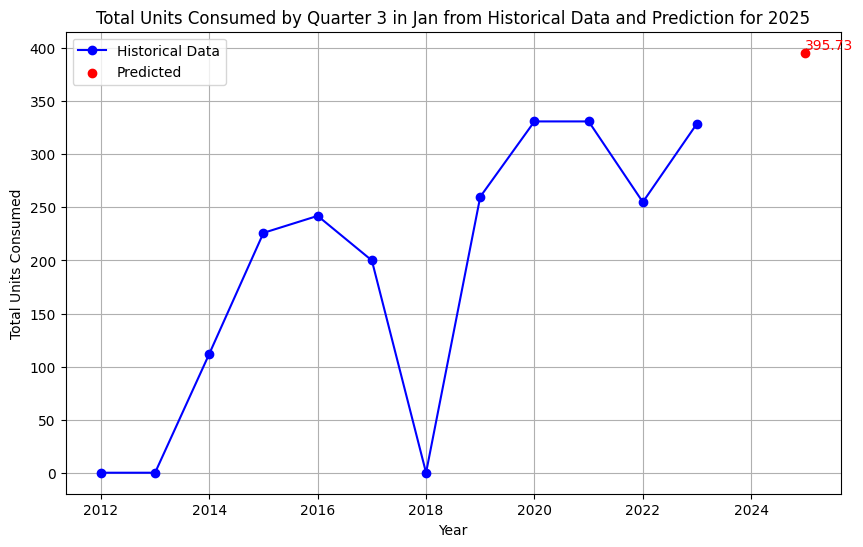

Bill: Rs. 4003.99


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Change this to the location of your data folder on Google Drive
data_folder_path = '/content/drive/My Drive/Data'

# User inputs
quarter_name = input("Enter the quarter name/number: ")
month = input("Enter the month (e.g., Jan, Feb, etc.): ")
year = int(input("Enter the year you want to predict for: "))

def prepare_dataset(data_folder_path, quarter_name, month):
    df_list = []
    for file_name in os.listdir(data_folder_path):
        if file_name.lower().startswith(month.lower()):
            year_part = file_name.rstrip('.xlsx')[-4:]
            try:
                year = int(year_part)
            except ValueError:
                print(f"Could not extract year from file name: {file_name}")
                continue

            file_path = os.path.join(data_folder_path, file_name)
            df = pd.read_excel(file_path)

            try:
                df_filtered = df[df['QtrNo'] == int(quarter_name)]
            except ValueError:
                df_filtered = df[df['QtrNo'].astype(str) == quarter_name]

            if not df_filtered.empty:
                df_filtered = df_filtered.copy()
                df_filtered.loc[:, 'Year'] = year
                df_list.append(df_filtered)

    if df_list:
        combined_df = pd.concat(df_list)
        combined_df.reset_index(drop=True, inplace=True)
        return combined_df
    else:
        return pd.DataFrame()

dataset = prepare_dataset(data_folder_path, quarter_name, month)

def train_and_predict(dataset, prediction_year):
    if not dataset.empty:
        X = dataset[['Year']]
        y = dataset['Total']
        model = LinearRegression()
        model.fit(X, y)
        prediction_input_df = pd.DataFrame([[prediction_year]], columns=['Year'])
        prediction = model.predict(prediction_input_df)[0]
        return prediction
    else:
        return "No data available for the specified quarter and month."

# Training the model and predicting for the user-specified year
prediction = train_and_predict(dataset, year)
print(f"Predicted total units consumed for quarter {quarter_name} in {month} {year}: {prediction}")



import matplotlib.pyplot as plt

def plot_data_with_prediction(dataset, prediction_year, prediction_value, quarter_name, month):
    # Ensure the dataset is sorted by Year for proper plotting
    dataset = dataset.sort_values(by='Year')

    plt.figure(figsize=(10, 6))

    # Plot
    plt.plot(dataset['Year'], dataset['Total'], label='Historical Data', marker='o', linestyle='-', color='blue')

    plt.scatter(prediction_year, prediction_value, color='red', label='Predicted', zorder=5)
    plt.text(prediction_year, prediction_value, f'{prediction_value:.2f}', color='red', ha='left', va='bottom')

    plt.title(f"Total Units Consumed by Quarter {quarter_name} in {month} from Historical Data and Prediction for {prediction_year}")
    plt.xlabel("Year")
    plt.ylabel("Total Units Consumed")
    plt.legend()
    plt.grid(True)
    plt.show()


# Assuming 'dataset' and 'prediction' from previous steps
if isinstance(prediction, (int, float)):
    plot_data_with_prediction(dataset, year, prediction, quarter_name, month)
else:
    print("Prediction was not generated due to lack of data.")



def calculate_electricity_bill(units):
    if units <= 100:
        unit_charge = 2.90
        fixed_charge = 70
    elif units <= 300:
        unit_charge = 4.85
        fixed_charge = 110
    elif units <= 500:
        unit_charge = 6.65
        fixed_charge = 110
    else:
        unit_charge = 7.80
        fixed_charge = 135

    energy_charges = units * unit_charge
    wheeling_charges = units * 1.57
    consumer_charges = energy_charges + fixed_charge + wheeling_charges
    gov_ed_charges = (16 * consumer_charges) / 100
    gov_tax = units * 0.2604

    total_bill = consumer_charges + gov_ed_charges + gov_tax
    return total_bill


# Example usage with the predicted units
total_bill = calculate_electricity_bill(prediction)
print(f"Bill: Rs. {total_bill:.2f}")






Enter the quarter name/number: 3
Enter the month (e.g., Jan, Feb, etc.): Jan
Enter the year you want to predict for: 2023
Predicted total units consumed for quarter 3 in Jan 2023: 341.0


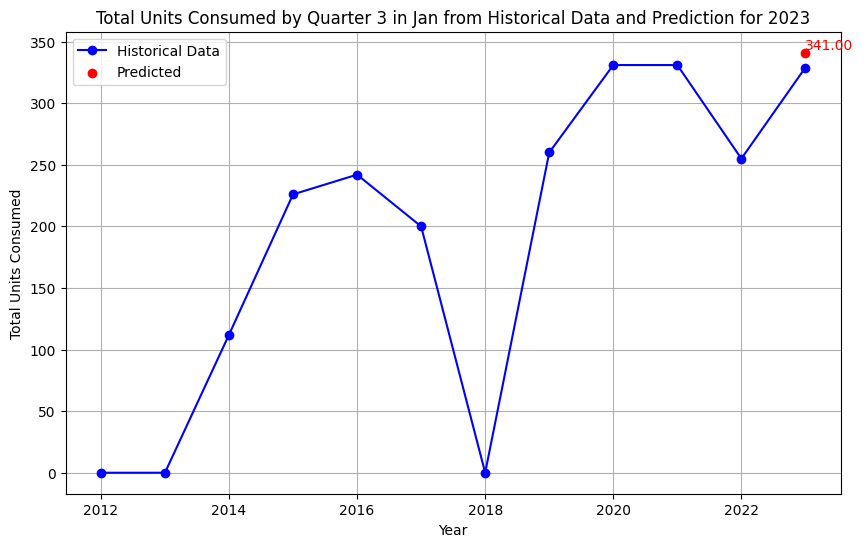

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Change this to the location of your data folder on Google Drive
data_folder_path = '/content/drive/My Drive/Data'

# User inputs
quarter_name = input("Enter the quarter name/number: ")
month = input("Enter the month (e.g., Jan, Feb, etc.): ")
year = int(input("Enter the year you want to predict for: "))

def prepare_dataset(data_folder_path, quarter_name, month):
    df_list = []
    for file_name in os.listdir(data_folder_path):
        if file_name.lower().startswith(month.lower()):
            year_part = file_name.rstrip('.xlsx')[-4:]
            try:
                year = int(year_part)
            except ValueError:
                print(f"Could not extract year from file name: {file_name}")
                continue

            file_path = os.path.join(data_folder_path, file_name)
            df = pd.read_excel(file_path)

            try:
                df_filtered = df[df['QtrNo'] == int(quarter_name)]
            except ValueError:
                df_filtered = df[df['QtrNo'].astype(str) == quarter_name]

            if not df_filtered.empty:
                df_filtered = df_filtered.copy()
                df_filtered.loc[:, 'Year'] = year
                df_list.append(df_filtered)

    if df_list:
        combined_df = pd.concat(df_list)
        combined_df.reset_index(drop=True, inplace=True)
        return combined_df
    else:
        return pd.DataFrame()

dataset = prepare_dataset(data_folder_path, quarter_name, month)

def train_and_predict(dataset, prediction_year):
    if not dataset.empty:
        X = dataset[['Year']]
        y = dataset['Total']
        model = LinearRegression()
        model.fit(X, y)
        prediction_input_df = pd.DataFrame([[prediction_year]], columns=['Year'])
        prediction = model.predict(prediction_input_df)[0]
        return prediction
    else:
        return "No data available for the specified quarter and month."

# Training the model and predicting for the user-specified year
prediction = train_and_predict(dataset, year)
print(f"Predicted total units consumed for quarter {quarter_name} in {month} {year}: {prediction}")



import matplotlib.pyplot as plt

def plot_data_with_prediction(dataset, prediction_year, prediction_value, quarter_name, month):
    # Ensure the dataset is sorted by Year for proper plotting
    dataset = dataset.sort_values(by='Year')

    plt.figure(figsize=(10, 6))

    # Plot
    plt.plot(dataset['Year'], dataset['Total'], label='Historical Data', marker='o', linestyle='-', color='blue')

    plt.scatter(prediction_year, prediction_value, color='red', label='Predicted', zorder=5)
    plt.text(prediction_year, prediction_value, f'{prediction_value:.2f}', color='red', ha='left', va='bottom')

    plt.title(f"Total Units Consumed by Quarter {quarter_name} in {month} from Historical Data and Prediction for {prediction_year}")
    plt.xlabel("Year")
    plt.ylabel("Total Units Consumed")
    plt.legend()
    plt.grid(True)
    plt.show()


# Assuming 'dataset' and 'prediction' from previous steps
if isinstance(prediction, (int, float)):
    plot_data_with_prediction(dataset, year, prediction, quarter_name, month)
else:
    print("Prediction was not generated due to lack of data.")









Actual: 329 units, predicted: 341 units
Accuracy: 96.4 percent

Enter the part name (Part1, Part2, Part3): Part1
Enter the quarter number (1-4): 3
Enter the year you want to predict for: 2025
Predicted total units consumed for quarter 3 in Part1 of 2025: 441.1622960372988
units: Rs. 4449.05


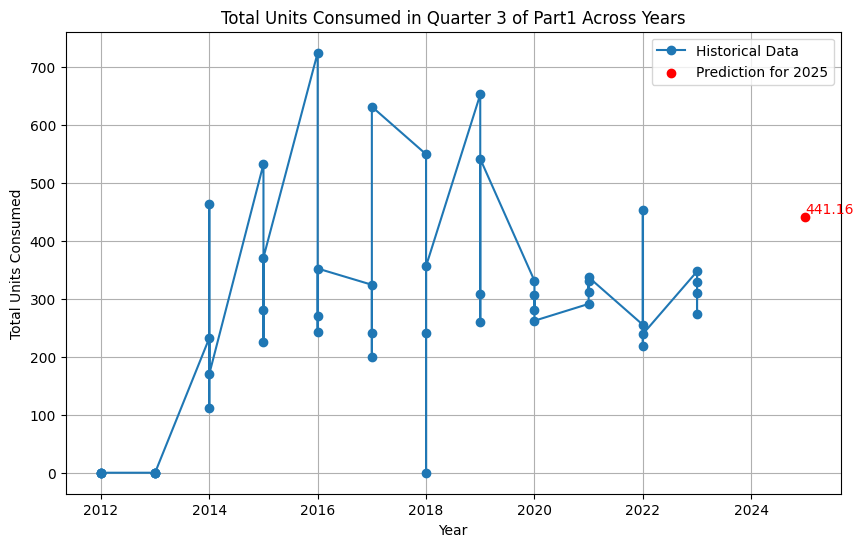

In [ ]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Change this to the location of your data folder on Google Drive
data_folder_path = '/content/drive/My Drive/Data'

# User inputs
part_name = input("Enter the part name (Part1, Part2, Part3): ")
quarter_number = int(input("Enter the quarter number : "))
year = int(input("Enter the year you want to predict for: "))

# Mapping parts to months
part_to_months = {
    'Part1': ['Jan', 'Feb', 'Mar', 'Apr'],
    'Part2': ['May', 'Jun', 'Jul', 'Aug'],
    'Part3': ['Sep', 'Oct', 'Nov', 'Dec']
}

def prepare_dataset(data_folder_path, part_name, quarter_number):
    df_list = []
    for file_name in os.listdir(data_folder_path):
        # Check if file name contains any month from the selected part
        if any(month.lower() in file_name.lower() for month in part_to_months[part_name]):
            year_part = file_name.rstrip('.xlsx')[-4:]
            try:
                year = int(year_part)
            except ValueError:
                print(f"Could not extract year from file name: {file_name}")
                continue

            file_path = os.path.join(data_folder_path, file_name)
            df = pd.read_excel(file_path)
            df = df[df['QtrNo'] == quarter_number]  # Filter data by the specific quarter
            if not df.empty:
                df['Year'] = year
                df_list.append(df)

    if df_list:
        combined_df = pd.concat(df_list)
        combined_df.reset_index(drop=True, inplace=True)
        return combined_df
    else:
        return pd.DataFrame()

dataset = prepare_dataset(data_folder_path, part_name, quarter_number)

def train_and_predict(dataset, prediction_year):
    if not dataset.empty:
        X = dataset[['Year']]
        y = dataset['Total']
        model = LinearRegression()
        model.fit(X, y)
        prediction_input_df = pd.DataFrame([[prediction_year]], columns=['Year'])
        prediction = model.predict(prediction_input_df)[0]
        return prediction
    else:
        return "No data available for the specified quarter and part."

prediction = train_and_predict(dataset, year)
print(f"Predicted total units consumed for quarter {quarter_number} in {part_name} of {year}: {prediction}")

def calculate_electricity_bill(units):
    if units <= 100:
        unit_charge = 2.90
        fixed_charge = 70
    elif units <= 300:
        unit_charge = 4.85
        fixed_charge = 110
    elif units <= 500:
        unit_charge = 6.65
        fixed_charge = 110
    else:
        unit_charge = 7.80
        fixed_charge = 135

    energy_charges = units * unit_charge
    wheeling_charges = units * 1.57
    consumer_charges = energy_charges + fixed_charge + wheeling_charges
    gov_ed_charges = (16 * consumer_charges) / 100
    gov_tax = units * 0.2604

    total_bill = consumer_charges + gov_ed_charges + gov_tax
    return total_bill


# Example usage with the predicted units
total_bill = calculate_electricity_bill(prediction)
print(f"units: Rs. {total_bill:.2f}")


def plot_data_with_prediction(dataset, prediction_year, prediction_value, quarter_number, part_name):
    dataset = dataset.sort_values(by='Year')
    plt.figure(figsize=(10, 6))
    plt.plot(dataset['Year'], dataset['Total'], label='Historical Data', marker='o', linestyle='-')
    plt.scatter(prediction_year, prediction_value, color='red', label='Prediction for {}'.format(prediction_year))
    plt.text(prediction_year, prediction_value, f'{prediction_value:.2f}', color='red', ha='left', va='bottom')
    plt.title(f"Total Units Consumed in Quarter {quarter_number} of {part_name} Across Years")
    plt.xlabel("Year")
    plt.ylabel("Total Units Consumed")
    plt.legend()
    plt.grid(True)
    plt.show()

if isinstance(prediction, (int, float)):
    plot_data_with_prediction(dataset, year, prediction, quarter_number, part_name)
else:
    print("Prediction was not generated due to lack of data.")




Enter the part name (Part1, Part2, Part3): Part1
Enter the quarter number (1-4): 3
Enter the year you want to predict for: 2025
Predicted total units consumed for quarter 3 in Part1 of 2025: 392.13308972120285


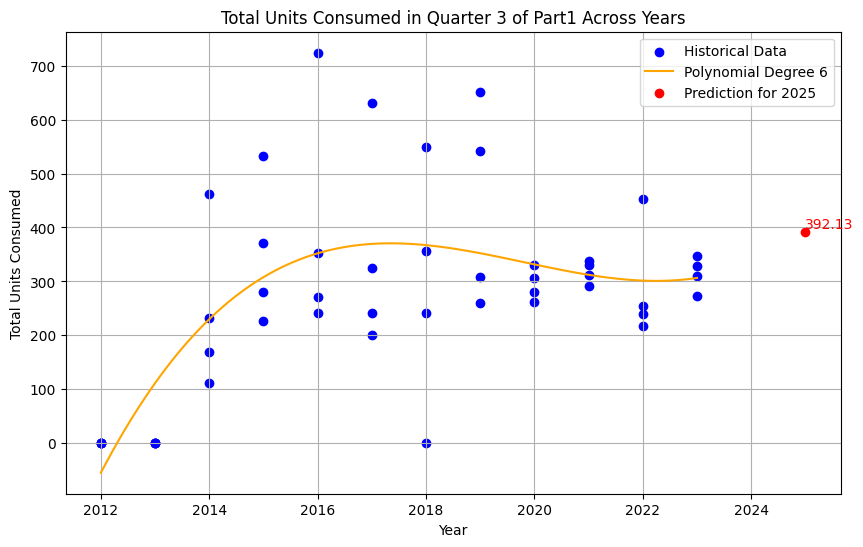

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Change this to the location of your data folder on Google Drive
data_folder_path = '/content/drive/My Drive/Data'

# User inputs
part_name = input("Enter the part name (Part1, Part2, Part3): ")
quarter_number = int(input("Enter the quarter number: "))
year = int(input("Enter the year you want to predict for: "))

# Mapping parts to months
part_to_months = {
    'Part1': ['Jan', 'Feb', 'Mar', 'Apr'],
    'Part2': ['May', 'Jun', 'Jul', 'Aug'],
    'Part3': ['Sep', 'Oct', 'Nov', 'Dec']
}

def prepare_dataset(data_folder_path, part_name, quarter_number):
    df_list = []
    for file_name in os.listdir(data_folder_path):
        if any(month.lower() in file_name.lower() for month in part_to_months[part_name]):
            year_part = file_name.rstrip('.xlsx')[-4:]
            try:
                year = int(year_part)
            except ValueError:
                print(f"Could not extract year from file name: {file_name}")
                continue

            file_path = os.path.join(data_folder_path, file_name)
            df = pd.read_excel(file_path)
            df = df[df['QtrNo'] == quarter_number]
            if not df.empty:
                df['Year'] = year
                df_list.append(df)

    if df_list:
        combined_df = pd.concat(df_list)
        combined_df.reset_index(drop=True, inplace=True)
        return combined_df
    else:
        return pd.DataFrame()

dataset = prepare_dataset(data_folder_path, part_name, quarter_number)

def train_and_predict_polynomial(dataset, prediction_year, degree=6):
    if not dataset.empty:
        X = dataset[['Year']].values
        y = dataset['Total'].values
        polynomial_features = PolynomialFeatures(degree=degree)
        polynomial_model = make_pipeline(polynomial_features, LinearRegression())
        polynomial_model.fit(X, y)
        prediction = polynomial_model.predict(np.array([[prediction_year]]))[0]
        return polynomial_model, prediction
    else:
        return None, "No data available for the specified quarter and part."

polynomial_model, prediction = train_and_predict_polynomial(dataset, year)

if polynomial_model:
    print(f"Predicted total units consumed for quarter {quarter_number} in {part_name} of {year}: {prediction}")

    def plot_data_with_polynomial_prediction(dataset, model, prediction_year, prediction_value, quarter_number, part_name, degree=6):
        X = dataset['Year'].values.reshape(-1, 1)
        y = dataset['Total'].values
        plt.figure(figsize=(10, 6))
        plt.scatter(dataset['Year'], dataset['Total'], label='Historical Data', color='blue')
        # Generate a range of years for plotting the polynomial curve
        X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        plt.plot(X_plot, model.predict(X_plot), color='orange', label=f'Polynomial Degree {degree}')
        plt.scatter(prediction_year, prediction_value, color='red', label='Prediction for {}'.format(prediction_year))
        plt.text(prediction_year, prediction_value, f'{prediction_value:.2f}', color='red', ha='left', va='bottom')
        plt.title(f"Total Units Consumed in Quarter {quarter_number} of {part_name} Across Years")
        plt.xlabel("Year")
        plt.ylabel("Total Units Consumed")
        plt.legend()
        plt.grid(True)
        plt.show()

    plot_data_with_polynomial_prediction(dataset, polynomial_model, year, prediction, quarter_number, part_name)
else:
    print(prediction)

